# ANLY-521 Final Project: 

# Sarcasm Detection with News Headlines Data

### Group Members:
* Zhe Zhou
* Xinyao Mo


<br>

## 1. Exploratory data analysis

In [54]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

#### Check NA

In [43]:
# Loading data from json file
data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)
print(data.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [44]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


#### Check Label Distribution

/Users/jameszz/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


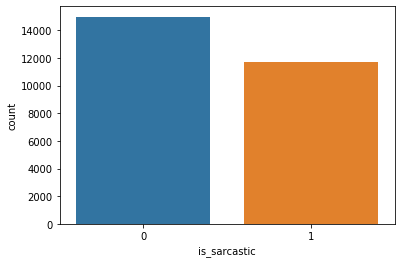

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['is_sarcastic'])

#### WordCloud of Sarcastic and Non-Sarcastic records

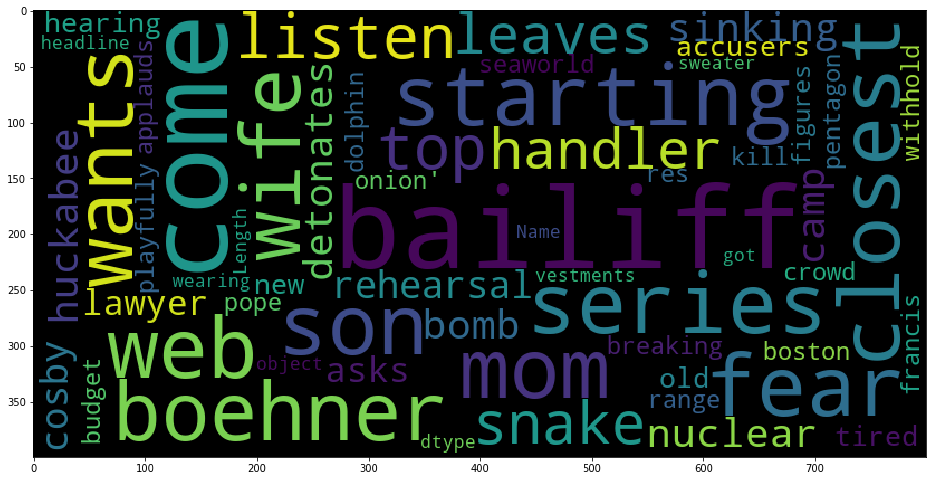

In [49]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_sar = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 100, max_font_size = 100, 
                random_state = 15, width=800, height=400)

plt.figure(figsize=(16, 12))
wordcloud_sar.generate(str(data.loc[data['is_sarcastic'] == 1, 'headline']))
plt.imshow(wordcloud_sar)

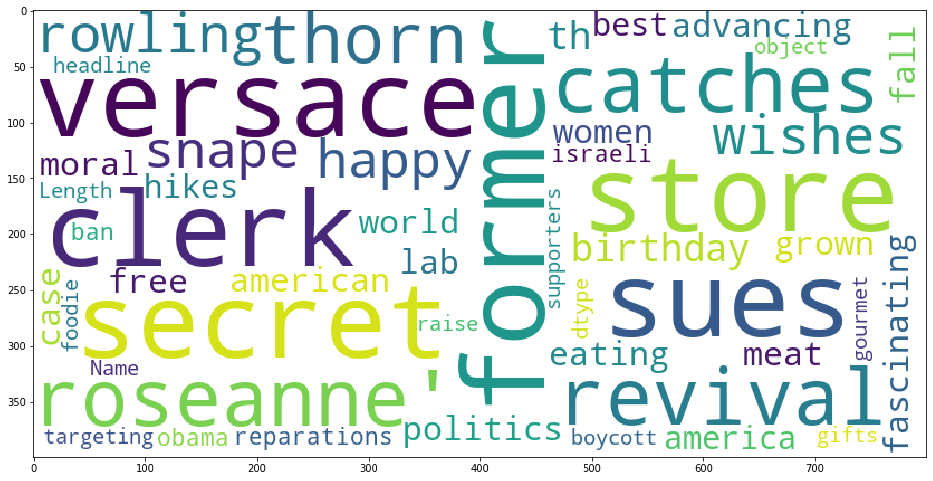

In [50]:
wordcloud_nonsar = WordCloud(background_color='white', stopwords = STOPWORDS,
                max_words = 100, max_font_size = 100, 
                random_state = 15, width=800, height=400)

plt.figure(figsize=(16, 12))
wordcloud_nonsar.generate(str(data.loc[data['is_sarcastic'] == 0, 'headline']))
plt.imshow(wordcloud_nonsar)

<br>

## 1. Classic Machine Learning Models

**In this part, we will try the following Models:**

* Linear SVM
* Gaussian Naive Bayes
* Logistic Regression
* Random Forest

#### Pre-Processing Text

In [52]:
import re
data['headline'] = data['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))
# getting features and labels
features = data['headline']
labels = data['is_sarcastic']

In [55]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

#### TF-IDF Vectorize

In [56]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [57]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .25, random_state = 0)

<br>

### 1.1 Linear SVM

In [58]:
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)

lsvc_pred_train = lsvc .predict(features_train)
lsvc_pred = lsvc .predict(features_test)

#metrics
print('linear SVC training data accuracy: ',lsvc.score(features_train, labels_train)) 
print('linear SVC testing data accuracy: ',lsvc.score(features_test, labels_test))  


print('linear SVC training Confusion matrix\n',confusion_matrix(labels_train,lsvc_pred_train))
print('linear SVC testing Confusion matrix\n',confusion_matrix(labels_test,lsvc_pred))

print('linear SVC training Classification_report\n',classification_report(labels_train,lsvc_pred_train))
print('linear SVC testing Classification_report\n',classification_report(labels_test,lsvc_pred))

linear SVC training data accuracy:  0.918526284259398
linear SVC testing data accuracy:  0.824198861934711
linear SVC training Confusion matrix
 [[10460   786]
 [  846  7939]]
linear SVC testing Confusion matrix
 [[3182  557]
 [ 617 2322]]
linear SVC training Classification_report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11246
           1       0.91      0.90      0.91      8785

    accuracy                           0.92     20031
   macro avg       0.92      0.92      0.92     20031
weighted avg       0.92      0.92      0.92     20031

linear SVC testing Classification_report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      3739
           1       0.81      0.79      0.80      2939

    accuracy                           0.82      6678
   macro avg       0.82      0.82      0.82      6678
weighted avg       0.82      0.82      0.82      6678



<br>

### 1.2 Gaussian Naive Bayes

In [60]:
gnb = GaussianNB()
gnb.fit(features_train, labels_train)

gnb_pred_train = gnb .predict(features_train)
gnb_pred = gnb .predict(features_test)

#metrics
print('Gaussian Naive Bayes training data accuracy: ',gnb.score(features_train, labels_train)) 
print('Gaussian Naive Bayes testing data accuracy: ',gnb.score(features_test, labels_test))  


print('Gaussian Naive Bayes training Confusion matrix\n',confusion_matrix(labels_train,gnb_pred_train))
print('Gaussian Naive Bayes testing Confusion matrix\n',confusion_matrix(labels_test,gnb_pred))

print('Gaussian Naive Bayes training Classification_report\n',classification_report(labels_train,gnb_pred_train))
print('Gaussian Naive Bayes testing Classification_report\n',classification_report(labels_test,gnb_pred))

Gaussian Naive Bayes training data accuracy:  0.7859318057011632
Gaussian Naive Bayes testing data accuracy:  0.7003593890386344
Gaussian Naive Bayes training Confusion matrix
 [[7825 3421]
 [ 867 7918]]
Gaussian Naive Bayes testing Confusion matrix
 [[2307 1432]
 [ 569 2370]]
Gaussian Naive Bayes training Classification_report
               precision    recall  f1-score   support

           0       0.90      0.70      0.78     11246
           1       0.70      0.90      0.79      8785

    accuracy                           0.79     20031
   macro avg       0.80      0.80      0.79     20031
weighted avg       0.81      0.79      0.79     20031

Gaussian Naive Bayes testing Classification_report
               precision    recall  f1-score   support

           0       0.80      0.62      0.70      3739
           1       0.62      0.81      0.70      2939

    accuracy                           0.70      6678
   macro avg       0.71      0.71      0.70      6678
weighted avg      

<br>

### 1.3 Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(features_train, labels_train)

lr_pred_train = lr .predict(features_train)
lr_pred = lr .predict(features_test)

#metrics
print('Logistic Regression training data accuracy: ',lr.score(features_train, labels_train)) 
print('Logistic Regression testing data accuracy: ',lr.score(features_test, labels_test))  


print('Logistic Regression training Confusion matrix\n',confusion_matrix(labels_train,lr_pred_train))
print('Logistic Regression testing Confusion matrix\n',confusion_matrix(labels_test,lr_pred))

print('Logistic Regression training Classification_report\n',classification_report(labels_train,lr_pred_train))
print('Logistic Regression testing Classification_report\n',classification_report(labels_test,lr_pred))

Logistic Regression training data accuracy:  0.8837801407817882
Logistic Regression testing data accuracy:  0.8279424977538186
Logistic Regression training Confusion matrix
 [[10142  1104]
 [ 1224  7561]]
Logistic Regression testing Confusion matrix
 [[3210  529]
 [ 620 2319]]
Logistic Regression training Classification_report
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     11246
           1       0.87      0.86      0.87      8785

    accuracy                           0.88     20031
   macro avg       0.88      0.88      0.88     20031
weighted avg       0.88      0.88      0.88     20031

Logistic Regression testing Classification_report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      3739
           1       0.81      0.79      0.80      2939

    accuracy                           0.83      6678
   macro avg       0.83      0.82      0.82      6678
weighted avg       0

<br>

### 1.4 Random Forest

In [62]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)

rfc_pred_train = rfc .predict(features_train)
rfc_pred = rfc .predict(features_test)

#metrics
print('Random Forest training data accuracy: ',rfc.score(features_train, labels_train)) 
print('Random Forest testing data accuracy: ',rfc.score(features_test, labels_test))  


print('Random Forest training Confusion matrix\n',confusion_matrix(labels_train,rfc_pred_train))
print('Random Forest testing Confusion matrix\n',confusion_matrix(labels_test,rfc_pred))

print('Random Forest training Classification_report\n',classification_report(labels_train,rfc_pred_train))
print('Random Forest testing Classification_report\n',classification_report(labels_test,rfc_pred))

Random Forest training data accuracy:  0.9891168688532774
Random Forest testing data accuracy:  0.7941000299490866
Random Forest training Confusion matrix
 [[11192    54]
 [  164  8621]]
Random Forest testing Confusion matrix
 [[3114  625]
 [ 750 2189]]
Random Forest training Classification_report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     11246
           1       0.99      0.98      0.99      8785

    accuracy                           0.99     20031
   macro avg       0.99      0.99      0.99     20031
weighted avg       0.99      0.99      0.99     20031

Random Forest testing Classification_report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      3739
           1       0.78      0.74      0.76      2939

    accuracy                           0.79      6678
   macro avg       0.79      0.79      0.79      6678
weighted avg       0.79      0.79      0.79      6678



<br>

## 2. LSTM with Different Word Embedding

**Plese read the README before running this part**

<br>

### 2.1 LSTM with GloVe

You need `glove.6B.200d.txt`, this file has to be downloaded via this link http://nlp.stanford.edu/data/glove.6B.zip After you unzip it, please find `glove.6B.200d.txt` and put it in your directory.

In [63]:
import pandas as pd
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [64]:
df = df.drop(['article_link'], axis=1)
df['len'] = df['headline'].apply(lambda x: len(x.split(" ")))
df.head()

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


In [65]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

max_features = 10000
maxlen = 25
embedding_size = 200

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = df['is_sarcastic']

In [66]:
EMBEDDING_FILE = 'glove.6B.200d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/Users/jameszz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [67]:
y = np.asarray(y)

model = Sequential()
model.add(Embedding(max_features, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

batch_size = 100
epochs = 5
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 27s 1ms/sample - loss: 0.5823 - accuracy: 0.6630 - recall_6: 0.4383 - precision_6: 0.6834 - val_loss: 0.3788 - val_accuracy: 0.8325 - val_recall_6: 0.7907 - val_precision_6: 0.8158
Epoch 2/5
21367/21367 [==============================] - 24s 1ms/sample - loss: 0.3446 - accuracy: 0.8649 - recall_6: 0.8550 - precision_6: 0.8410 - val_loss: 0.3290 - val_accuracy: 0.8589 - val_recall_6: 0.8085 - val_precision_6: 0.8567
Epoch 3/5
21367/21367 [==============================] - 24s 1ms/sample - loss: 0.2358 - accuracy: 0.9137 - recall_6: 0.9107 - precision_6: 0.8953 - val_loss: 0.3393 - val_accuracy: 0.8613 - val_recall_6: 0.8683 - val_precision_6: 0.8210
Epoch 4/5
21367/21367 [==============================] - 24s 1ms/sample - loss: 0.1585 - accuracy: 0.9435 - recall_6: 0.9382 - precision_6: 0.9339 - val_loss: 0.3850 - val_accuracy: 0.8617 - val_recall_6: 0.8843 - val_precision_6: 0.8122

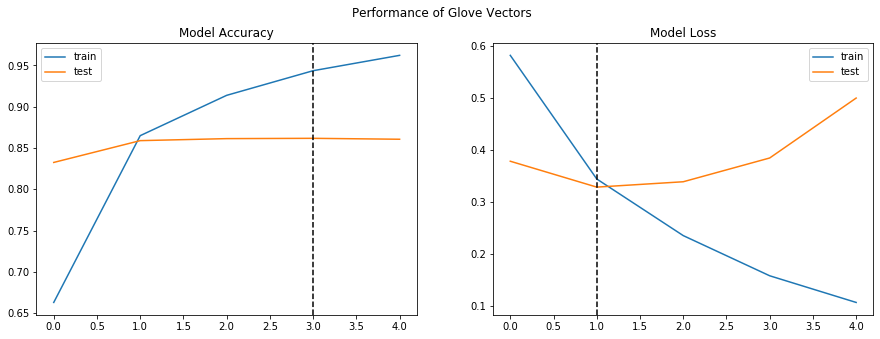

In [68]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Glove Vectors")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()

<br>

### 2.2 LSTM with FastText


Pretrained FastText word embedding file `wiki-news-300d-1M.vec` has to be downloaded from:
https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

Please do not forget to unzip the downloaded file, and place it under your directory.

In [69]:
EMBEDDING_FILE = 'wiki-news-300d-1M.vec'
def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))
embed_size = 300
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [70]:
max_features = 10000
embedding_size = 300

model2 = Sequential()
model2.add(Embedding(max_features, embedding_size))
model2.add(Bidirectional(LSTM(128, return_sequences = True)))
model2.add(GlobalMaxPool1D())
model2.add(Dense(40, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(20, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

batch_size = 100
epochs = 5
history2 = model2.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 32s 2ms/sample - loss: 0.5174 - accuracy: 0.7274 - recall_7: 0.5376 - precision_7: 0.7750 - val_loss: 0.3501 - val_accuracy: 0.8495 - val_recall_7: 0.8146 - val_precision_7: 0.8333
Epoch 2/5
21367/21367 [==============================] - 35s 2ms/sample - loss: 0.2796 - accuracy: 0.8987 - recall_7: 0.8840 - precision_7: 0.8858 - val_loss: 0.3398 - val_accuracy: 0.8525 - val_recall_7: 0.8267 - val_precision_7: 0.8310
Epoch 3/5
21367/21367 [==============================] - 54s 3ms/sample - loss: 0.1773 - accuracy: 0.9434 - recall_7: 0.9366 - precision_7: 0.9351 - val_loss: 0.4243 - val_accuracy: 0.8489 - val_recall_7: 0.7851 - val_precision_7: 0.8535
Epoch 4/5
21367/21367 [==============================] - 54s 3ms/sample - loss: 0.1077 - accuracy: 0.9666 - recall_7: 0.9643 - precision_7: 0.9600 - val_loss: 0.5671 - val_accuracy: 0.8469 - val_recall_7: 0.8427 - val_precision_7: 0.8104

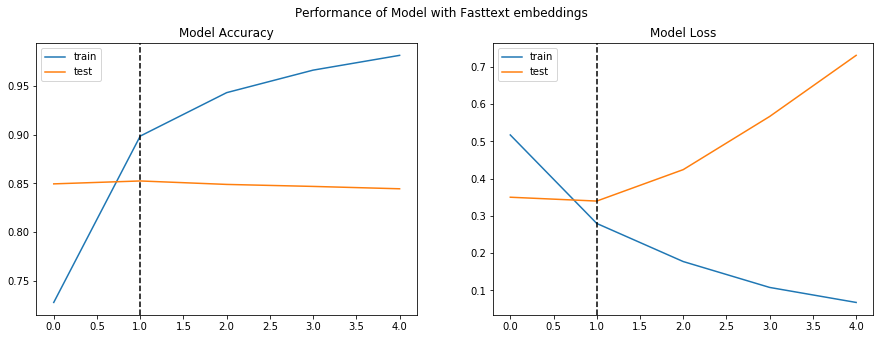

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model with Fasttext embeddings")
ax1.plot(history2.history['accuracy'])
ax1.plot(history2.history['val_accuracy'])
vline_cut = np.where(history2.history['val_accuracy'] == np.max(history2.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
vline_cut = np.where(history2.history['val_loss'] == np.min(history2.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()

<br>

### 2.3 LSTM Results

<br>

**LSTM Training Results Summary:**

|Embedding | Accuracy | Precision | Recall| F1 |
|--- | --- | ---|---|---|
|GloVe (glove.6B.200d) |0.96| 0.96 | 0.95 | 0.95 |
|FastText (wiki-news-300d-1M.vec) |0.98| 0.98 | 0.97 | 0.97 |


**LSTM Testing Results Summary:**

|Embedding | Accuracy | Precision | Recall| F1 |
|--- | --- | ---|---|---|
|GloVe (glove.6B.200d) |0.86| 0.84 | 0.83 | 0.83 |
|FastText (wiki-news-300d-1M.vec) |0.84| 0.83 | 0.82 | 0.82 |

